In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [72]:
data = pd.read_csv('IPO_10142019.csv')
data.head()

Issuer Company Listing Date  Issue Price  Issue Size   QIB    NII   RII  \
0  Sterling & Wils    20-Aug-19          780     3125.00  1.02   0.89  0.30   
1  Indiamart Inter     7-Apr-19          973      474.12 30.83  62.13 14.07   
2           Neogen     5-Aug-19          215      131.48 30.49 113.88 16.06   
3       Metropolis    15-Apr-19          880     1200.18  8.88   3.03  2.21   
4       Rail Vikas     4-Nov-19           19      430.88  1.36   0.80  2.92   

   EMP  Total  Open Price  Low Price  High Price  Close Price  Change  Year  
0  nan   0.85      700.00     690.10      753.45       725.35   -7.01  2019  
1  nan  36.21     1180.00    1180.00     1338.00      1302.55   33.87  2019  
2  nan  41.18      251.00     261.00      291.85       263.55   22.58  2019  
3  nan   5.84      960.00     935.00      982.00       959.55    9.04  2019  
4  nan   1.82       19.00      18.65       19.80        19.05    0.26  2019

In [73]:
data.describe()

Issue Price  Issue Size     QIB    NII    RII    EMP  Total  \
count       406.00      406.00  372.00 379.00 379.00 159.00 381.00   
mean        262.34      705.82   51.65  48.65   8.09   1.03  22.69   
std         271.28     1623.57  518.60 101.87  13.41   1.56  38.34   
min          10.00        6.00    0.01   0.02   0.03   0.01   0.44   
25%          82.75       67.93    1.33   1.79   1.20   0.33   1.65   
50%         170.00      173.05    5.67   5.10   3.18   0.89   4.80   
75%         330.00      600.00   34.20  48.61   8.71   1.13  29.53   
max        1766.00    15199.44 9999.00 958.07 123.80  16.04 273.05   

       Open Price  Low Price  High Price  Close Price  Change    Year  
count      406.00     406.00      406.00       406.00  406.00  406.00  
mean       298.18     278.24      335.72       307.80   17.67 2011.14  
std        325.33     318.12      353.87       339.79   44.75    3.96  
min          9.50       4.75        9.50         5.25  -69.83 2006.00  
25%         90.00      76.70      107.41        90.78   -7.10 2007.00  
50%        181.55     164.75      207.38       184.70    6.03 2010.00  
75%        399.30     357.21      452.69       415.40   31.46 2015.00  
max       2725.00    2725.00     3020.25      2892.80  286.25 2019.00

In [74]:
data = data.drop(['Issuer Company','Low Price', 'High Price', 'Close Price','EMP', 'Year', 'Open Price','Listing Date'], axis=1)

In [75]:
data.describe()

Issue Price  Issue Size     QIB    NII    RII  Total  Change
count       406.00      406.00  372.00 379.00 379.00 381.00  406.00
mean        262.34      705.82   51.65  48.65   8.09  22.69   17.67
std         271.28     1623.57  518.60 101.87  13.41  38.34   44.75
min          10.00        6.00    0.01   0.02   0.03   0.44  -69.83
25%          82.75       67.93    1.33   1.79   1.20   1.65   -7.10
50%         170.00      173.05    5.67   5.10   3.18   4.80    6.03
75%         330.00      600.00   34.20  48.61   8.71  29.53   31.46
max        1766.00    15199.44 9999.00 958.07 123.80 273.05  286.25

In [76]:
y = data['Change']
x1 = data.drop(['Change'],axis=1)

In [77]:
x1.head()

Issue Price  Issue Size   QIB    NII   RII  Total
0          780     3125.00  1.02   0.89  0.30   0.85
1          973      474.12 30.83  62.13 14.07  36.21
2          215      131.48 30.49 113.88 16.06  41.18
3          880     1200.18  8.88   3.03  2.21   5.84
4           19      430.88  1.36   0.80  2.92   1.82

In [78]:
data.isnull().sum()

Issue Price     0
Issue Size      0
QIB            34
NII            27
RII            27
Total          25
Change          0
dtype: int64

In [79]:
data=data.dropna(axis=0)

In [80]:
data.describe(include='all')

Issue Price  Issue Size     QIB    NII    RII  Total  Change
count       370.00      370.00  370.00 370.00 370.00 370.00  370.00
mean        281.70      749.14   51.90  49.79   8.20  23.30   16.87
std         276.25     1664.22  520.00 102.84  13.55  38.74   39.15
min          10.00       14.00    0.01   0.03   0.03   0.44  -63.78
25%         100.00       82.01    1.33   1.84   1.18   1.76   -6.46
50%         184.00      222.29    5.67   5.41   3.13   5.04    6.22
75%         373.75      645.77   34.91  49.64   9.05  31.04   31.17
max        1766.00    15199.44 9999.00 958.07 123.80 273.05  241.75

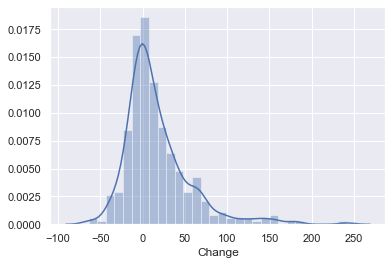

In [81]:
sns.distplot(data['Change'])

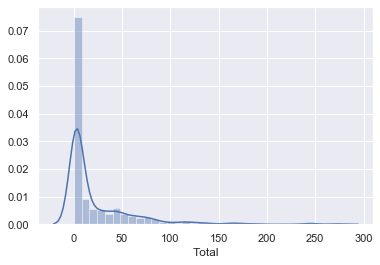

In [82]:
sns.distplot(data['Total'])

KeyError: 'Open Price'

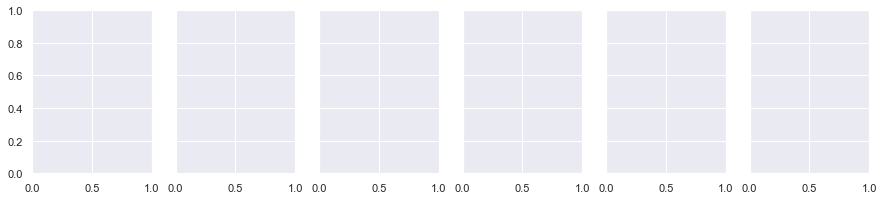

In [12]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(1, 6, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Year'],data['Open Price'])
ax1.set_title('Listening Date and Open Price')

ax2.scatter(data['Issue Size'],data['Open Price'])
ax2.set_title('Price and Open Price')

ax3.scatter(data['QIB'],data['Open Price'])
ax3.set_title('QIB and Open Price')

ax4.scatter(data['NII'],data['Open Price'])
ax4.set_title('NII and Open Price')

ax5.scatter(data['RII'],data['Open Price'])
ax5.set_title('RII and Open Price')

ax6.scatter(data['Total'],data['Open Price'])
ax6.set_title('Total and Open Price')


plt.show()

# Multicollinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data.columns.values

array(['Issue Price', 'Issue Size', 'QIB', 'NII', 'RII', 'Total',
       'Change'], dtype=object)

In [84]:
variables = data[['Issue Price', 'Issue Size','QIB','RII', 'Change','Total']]
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

variables.head()

Issue Price  Issue Size   QIB   RII  Change  Total
0          780     3125.00  1.02  0.30   -7.01   0.85
1          973      474.12 30.83 14.07   33.87  36.21
2          215      131.48 30.49 16.06   22.58  41.18
3          880     1200.18  8.88  2.21    9.04   5.84
4           19      430.88  1.36  2.92    0.26   1.82

In [85]:
variables.describe()

Issue Price  Issue Size     QIB    RII  Change  Total
count       370.00      370.00  370.00 370.00  370.00 370.00
mean        281.70      749.14   51.90   8.20   16.87  23.30
std         276.25     1664.22  520.00  13.55   39.15  38.74
min          10.00       14.00    0.01   0.03  -63.78   0.44
25%         100.00       82.01    1.33   1.18   -6.46   1.76
50%         184.00      222.29    5.67   3.13    6.22   5.04
75%         373.75      645.77   34.91   9.05   31.17  31.04
max        1766.00    15199.44 9999.00 123.80  241.75 273.05

In [86]:
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF     Features
0 1.61  Issue Price
1 1.28   Issue Size
2 1.22          QIB
3 3.03          RII
4 2.03       Change
5 3.22        Total

In [87]:
data_no_multicollinearity = data.drop(['NII'],axis=1)

In [88]:
data_no_multicollinearity.head()

Issue Price  Issue Size   QIB   RII  Total  Change
0          780     3125.00  1.02  0.30   0.85   -7.01
1          973      474.12 30.83 14.07  36.21   33.87
2          215      131.48 30.49 16.06  41.18   22.58
3          880     1200.18  8.88  2.21   5.84    9.04
4           19      430.88  1.36  2.92   1.82    0.26

# Data with Dummies

In [89]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [90]:
data_with_dummies.head()

Issue Price  Issue Size   QIB   RII  Total  Change
0          780     3125.00  1.02  0.30   0.85   -7.01
1          973      474.12 30.83 14.07  36.21   33.87
2          215      131.48 30.49 16.06  41.18   22.58
3          880     1200.18  8.88  2.21   5.84    9.04
4           19      430.88  1.36  2.92   1.82    0.26

In [91]:
data_preprocessed = data_with_dummies

In [92]:
targets = data_preprocessed['Change']
inputs = data_preprocessed.drop(['Change'], axis=1)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
Scaler = StandardScaler()

In [95]:
Scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
inputs.describe()

Issue Price  Issue Size     QIB    RII  Total
count       370.00      370.00  370.00 370.00 370.00
mean        281.70      749.14   51.90   8.20  23.30
std         276.25     1664.22  520.00  13.55  38.74
min          10.00       14.00    0.01   0.03   0.44
25%         100.00       82.01    1.33   1.18   1.76
50%         184.00      222.29    5.67   3.13   5.04
75%         373.75      645.77   34.91   9.05  31.04
max        1766.00    15199.44 9999.00 123.80 273.05

In [97]:
input_scaled=Scaler.transform(inputs)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test, y_train,y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=376)

In [100]:
x_train, y_train

(array([[-0.07865955,  0.16815407, -0.05728734, -0.53612391, -0.28876393],
        [-0.72388538, -0.41375206, -0.09876677, -0.43121574, -0.56201285],
        [-0.9848756 , -0.41153782, -0.09793873, -0.4711104 , -0.57183637],
        ...,
        [ 2.54936699, -0.15178569, -0.09632114,  0.73607243, -0.48756092],
        [-0.6405135 ,  0.53557967, -0.0242617 , -0.03817947,  0.11529289],
        [-0.53176758, -0.08414304, -0.08582612, -0.48145346, -0.42525913]]),
 186     8.83
 242     2.32
 155   153.50
 42     -1.43
 303    56.56
 296    93.54
 395     4.44
 104    -3.08
 236    16.12
 23     -2.85
 399    41.56
 39      0.03
 205    10.52
 139     7.35
 257   129.25
 1      33.87
 297    -7.57
 70     12.27
 315   182.00
 249    -9.25
 84     58.68
 26     -8.71
 213     2.81
 301    42.32
 222     6.10
 370    -8.85
 57      0.97
 380    45.95
 321    55.19
 144    96.02
 77     18.43
 207    68.73
 282   -10.43
 97     31.57
 377    14.07
 352   -17.59
 260   -39.45
 98     49.85
 10

In [101]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((296, 5), (74, 5), (296,), (74,))

# Create the Regression

In [102]:
reg = LinearRegression()

In [103]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y_hat = reg.predict(x_train)

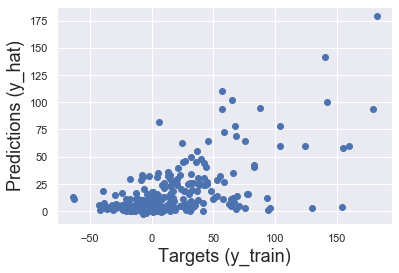

In [105]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

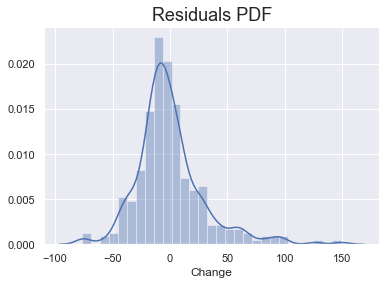

In [106]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)


In [107]:
reg.score(x_train,y_train)

0.378669931898701

In [108]:
reg.intercept_

16.86838356648918

In [109]:
reg.coef_

array([-0.89298757, -0.19478609,  0.191408  , 22.51512154,  5.51678535])

In [110]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features  Weights
0  Issue Price    -0.89
1   Issue Size    -0.19
2          QIB     0.19
3          RII    22.52
4        Total     5.52

In [61]:
inputs.columns.values

array(['Issue Price', 'Issue Size', 'QIB', 'RII', 'Total', 'Year'],
      dtype=object)

# Testing

In [41]:
y_hat_test = reg.predict(x_test)

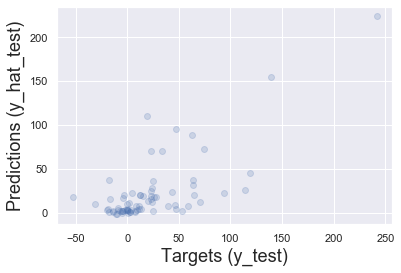

In [42]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [43]:
pf_df = pd.DataFrame(y_hat_test, columns=['Prediction'])
pf_df.head()

Prediction
0    1.125715
1   19.903599
2   23.113626
3   -0.279912
4   16.942399

In [44]:
pf_df.head()

Prediction
0    1.125715
1   19.903599
2   23.113626
3   -0.279912
4   16.942399

In [47]:
pf_df['Target'] = (y_test)
pf_df.head()

Prediction  Target
0    1.125715    7.34
1   19.903599   12.70
2   23.113626   43.07
3   -0.279912    1.17
4   16.942399   -3.94

In [46]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     7.34
1    12.70
2    43.07
3     1.17
4    -3.94
Name: Change, dtype: float64

In [48]:
pf_df['Target'] = (y_test)
pf_df.head()

Prediction  Target
0    1.125715    7.34
1   19.903599   12.70
2   23.113626   43.07
3   -0.279912    1.17
4   16.942399   -3.94

In [49]:
pf_df['Residuals'] = pf_df['Prediction'] - pf_df['Target']
pf_df['Residuals %'] = np.absolute((pf_df['Prediction'] - pf_df['Target'])/pf_df['Target']*100)

In [50]:
pf_df.head()

Prediction  Target  Residuals  Residuals %
0    1.125715    7.34  -6.214285    84.663282
1   19.903599   12.70   7.203599    56.721251
2   23.113626   43.07 -19.956374    46.334743
3   -0.279912    1.17  -1.449912   123.924104
4   16.942399   -3.94  20.882399   530.010115

In [51]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
pf_df.sort_values(by=['Residuals %'])
pf_df.describe()

Prediction  Target  Residuals  Residuals %
count       74.00   74.00      74.00        74.00
mean        21.68   21.76      -0.08       405.93
std         36.83   43.35      30.29      2094.80
min         -1.85  -52.86     -88.27         2.51
25%          2.37   -3.60      -7.86        51.85
50%          9.29   10.55       2.84        85.81
75%         21.36   32.00      13.88       131.46
max        223.25  241.75      91.76     18008.83

In [52]:
type(pf_df)

pandas.core.frame.DataFrame

In [53]:
type(x_test)
pf_df.shape

(74, 4)

In [54]:
type(pf_df)
#type(x_test)

pandas.core.frame.DataFrame

In [55]:
pf_df.to_csv('Test.csv')